# Actividad Semanal #6 
Elmer Payro - A01014943
01/Nov/2022

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv('data/default_of_credit_card_clients.csv', index_col='ID')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [19]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)
print('Datatypes: ', df.dtypes)
print('Info: ', df.info())

Shape:  (30000, 24)
Columns:  Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')
Datatypes:  X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29

In [20]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna 

In [21]:
def clean_data(df):
    #Removemos columna Y que es la variable de salida
    df.drop(columns='Y', inplace=True)
    df.dropna(thresh=20, inplace=True)
    df['X10'].fillna(df['X10'].mode())
    df['X3'] = df['X3'].replace([0,5,6],4)
    df.dropna(inplace=True)
    return df

In [22]:
df_clean = clean_data(df)
df_clean.columns = ['Given_credit', 'Gender', 'Education', 'Marital_status', 'Age','PP_Sep','PP_Aug','PP_Jul','PP_Jun','PP_May','PP_Apr',
                    'BS_Sep','BS_Aug','BS_Jul','BS_Jun','BS_May','BS_Apr','LP_Sep','LP_Aug','LP_Jul','LP_Jun','LP_May','LP_Apr']
df_clean.head()

,Given_credit,Gender,Education,Marital_status,Age,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


4.- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [23]:
df_clean.describe()

,Given_credit,Gender,Education,Marital_status,Age,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,0.489070,0.744557,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Como medida de tendencia central tenemos la fila de "mean" y como dispersión tenemos "std" (Desviación estándar)

5.- Realiza el conteo de las variables categóricas

In [26]:
categorical_features = ['Gender','Education','Marital_status']
numerical_features = ['Given_credit', 'Age','PP_Sep','PP_Aug','PP_Jul','PP_Jun','PP_May','PP_Apr',
                        'BS_Sep','BS_Aug','BS_Jul','BS_Jun','BS_May','BS_Apr','LP_Sep','LP_Aug','LP_Jul','LP_Jun','LP_May','LP_Apr']

6.- Escala los datos, si consideras necesario

In [27]:
categorical_transformer = Pipeline([('OE', OneHotEncoder(handle_unknown="ignore"))])
numerical_transformer = Pipeline([(('MS', MinMaxScaler()))])

preprocessor = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical_features),
                                                ('categorical', categorical_transformer, categorical_features)], 
                                                remainder='passthrough')

In [62]:
df_transformed = preprocessor.fit_transform(df)
df_transformed

array([[0.01010101, 0.05172414, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.0862069 , 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.08080808, 0.22413793, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.02020202, 0.27586207, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.07070707, 0.34482759, 0.3       , ..., 1.        , 0.        ,
        0.        ],
       [0.04040404, 0.43103448, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

7.- Reduce las dimensiones con PCA, si consideras necesario. 
    Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%


In [34]:
pca = PCA(n_components=5)

pca.fit(df_transformed)

pca_summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_), 
                            'Proportion of variance': pca.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pca_summary.round(4)

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.7273,0.2998,0.2998
1,0.6882,0.2684,0.5682
2,0.6228,0.2198,0.7880
3,0.4467,0.1131,0.9011
4,0.2418,0.0331,0.9343


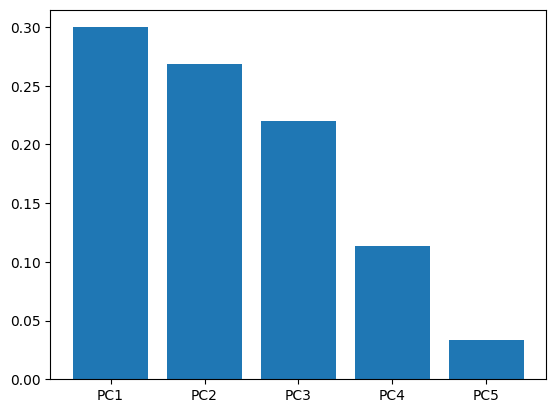

In [40]:
plt.bar(['PC1','PC2','PC3','PC4','PC5'], pca.explained_variance_ratio_)
plt.show()


    b. Indica la importancia de las variables en cada componente

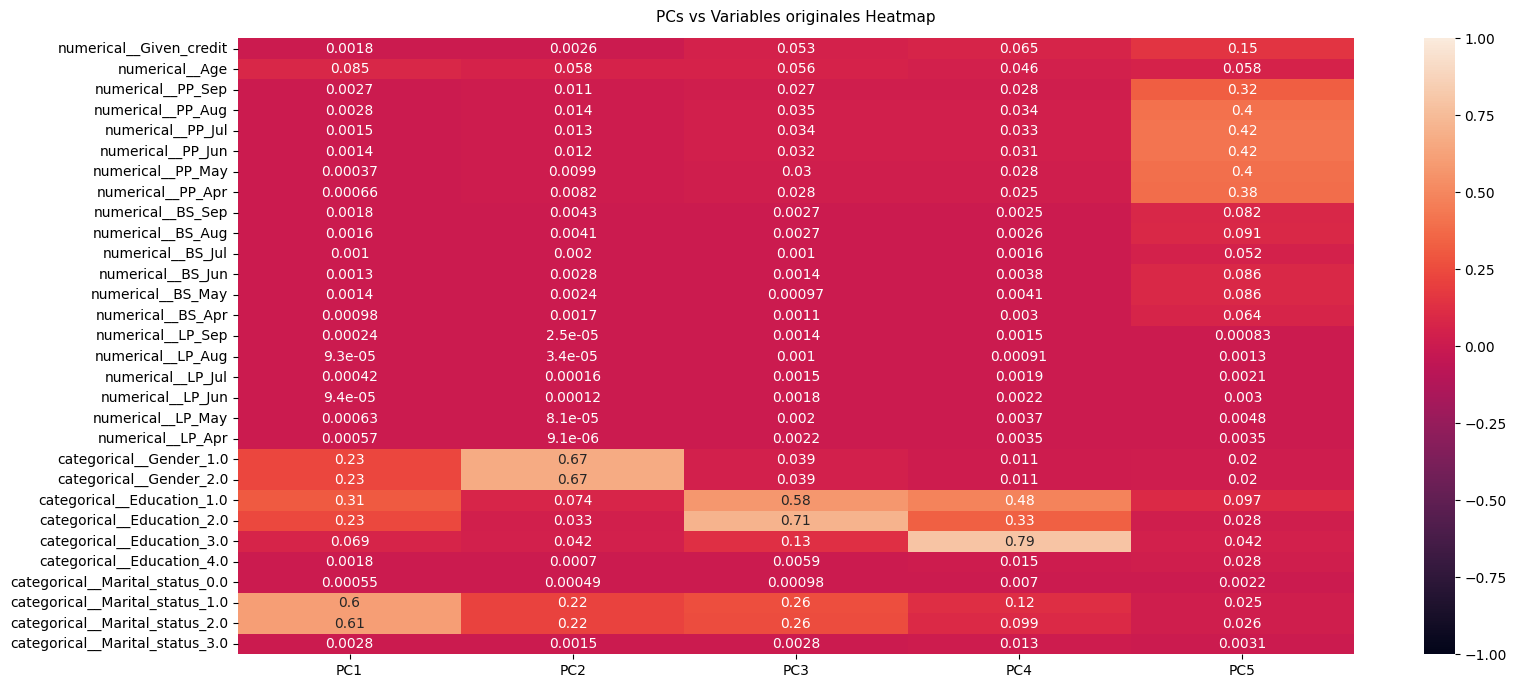

In [66]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(),
                                columns= ['PC{}'.format(i) for i in range(1, len(pca_summary.index) + 1)],
                                index=preprocessor.get_feature_names_out()
                                ).abs()

plt.figure(figsize=(18,8))
pca_heatmap = sns.heatmap(pcaComponents_df, vmin=-1, vmax=1, annot=True)
pca_heatmap.set_title('PCs vs Variables originales Heatmap', fontdict={'fontsize':11}, pad=12)
plt.show()


En el PC1 está compuesto mayormente por Marital_status, Gender y Education, PC2 por Gender, PC3 por Education, PC4 por Education y PC5 por los PPs

8.- Elabora los histogramas de los atributos para visualizar su distribución

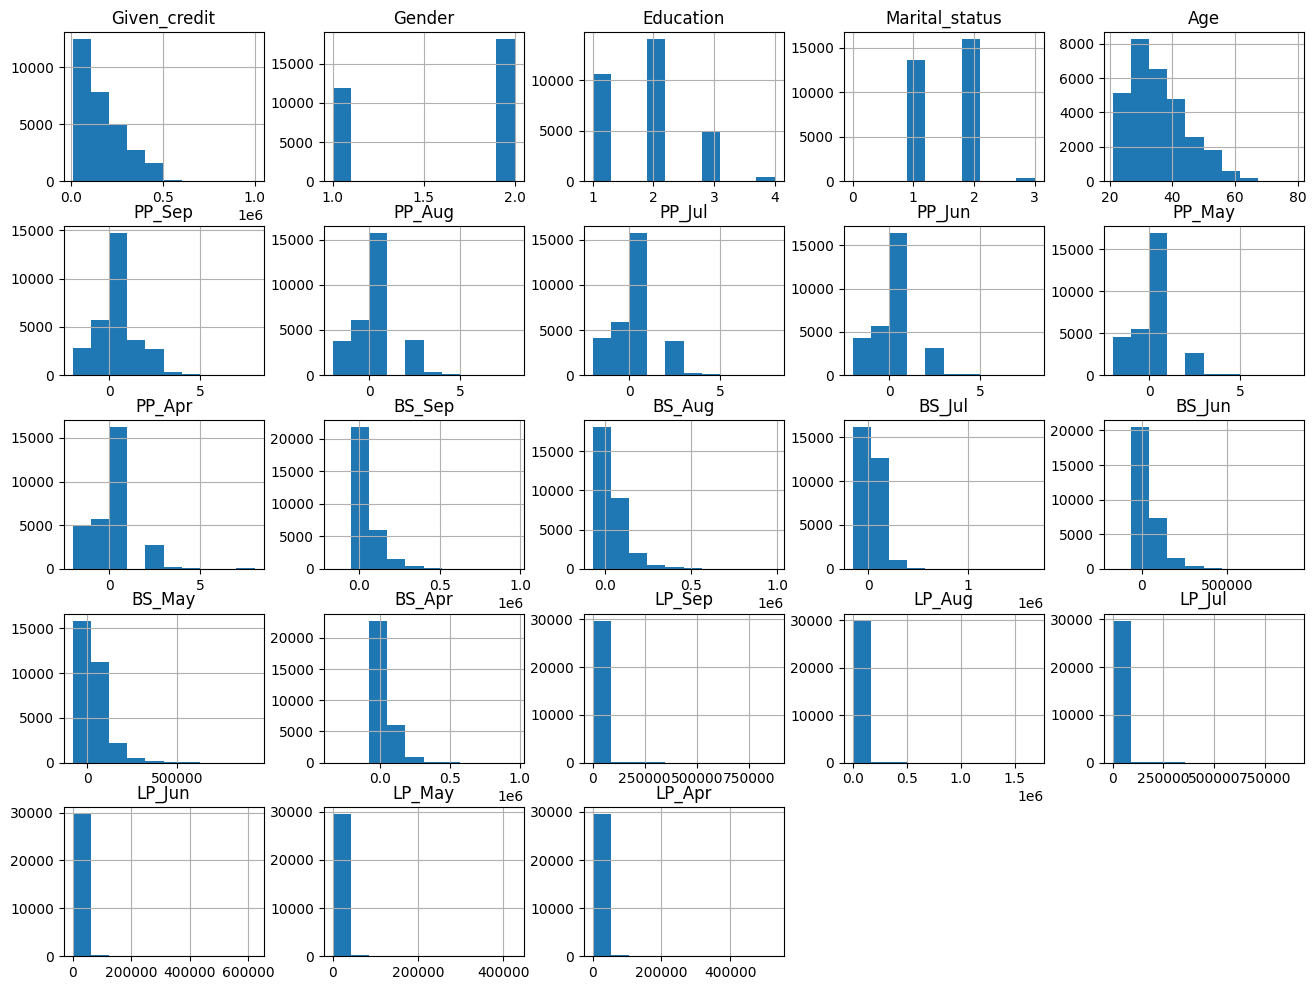

In [77]:
df_clean.hist(figsize=(16,12))

plt.show()

9.- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

Hay una alta correlación entre las variables de BS y PP con sus respectivos meses

Text(0.5, 1.0, 'Correlation Heatmap')

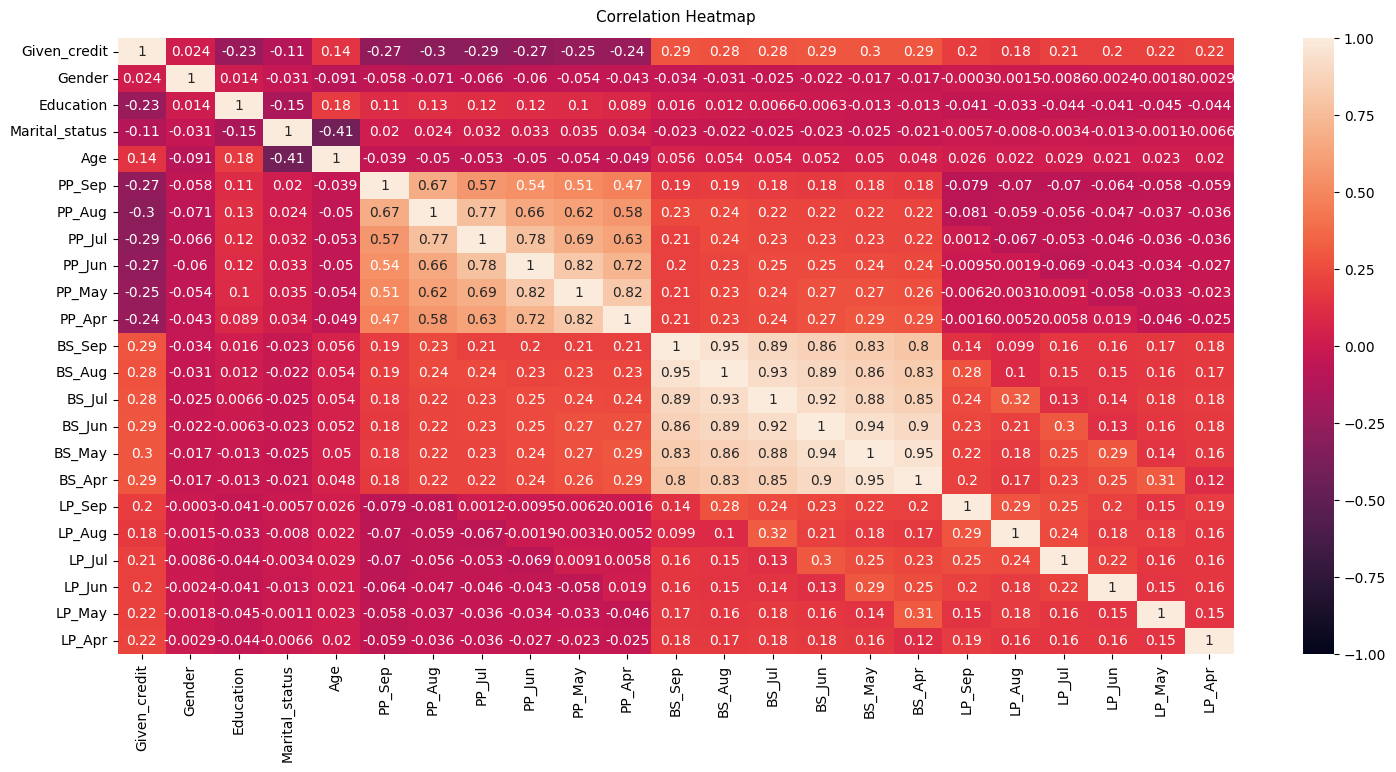

In [79]:
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':11}, pad=12)

La mayoría de las personas tienen entre 30 - 40 años y la mayoría son mujeres

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Gender'}>]], dtype=object)

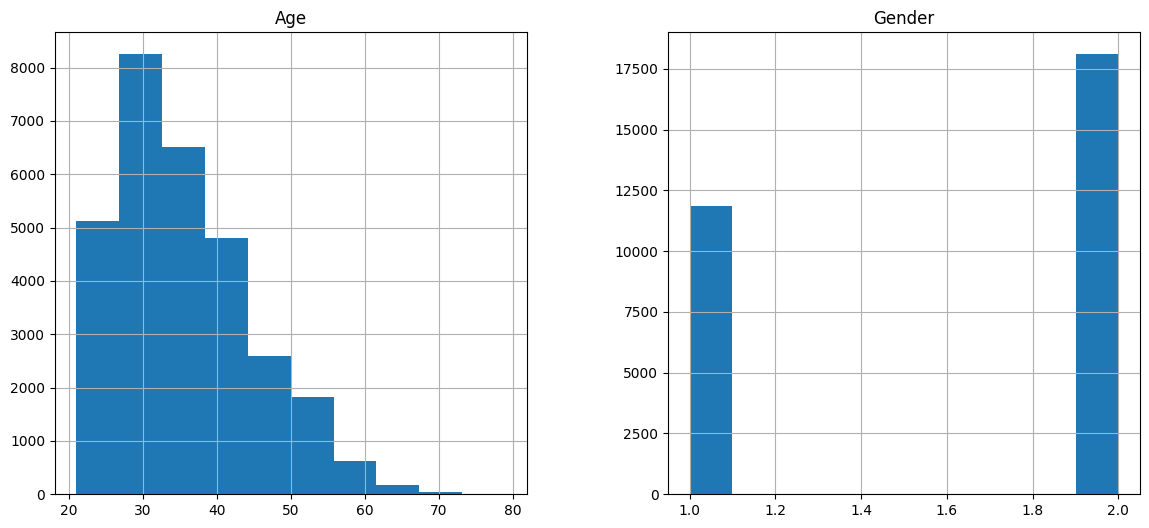

In [102]:
df_clean[['Age','Gender']].hist(figsize=(14,6))

Aqui podemos ver que los pagos se comportan muy similar a través de los meses, lo que indica que tienen una alta correlación y podriamos descartar las variables repetidas

<AxesSubplot: ylabel='Density'>

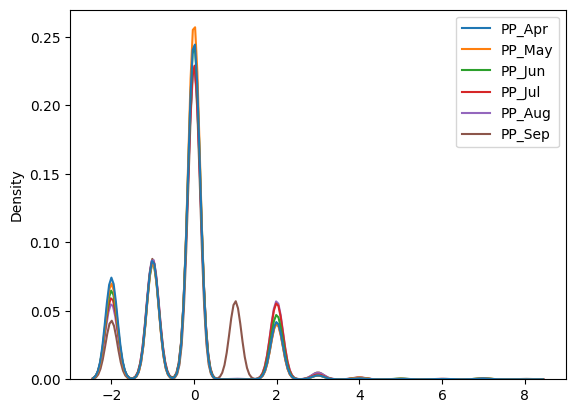

In [94]:
sns.kdeplot(df_clean[['PP_Apr','PP_May', 'PP_Jun','PP_Jul','PP_Aug','PP_Sep']])

<AxesSubplot: >

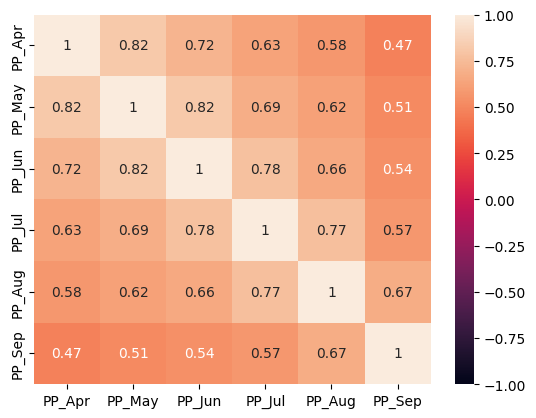

In [97]:
sns.heatmap(df_clean[['PP_Apr','PP_May', 'PP_Jun','PP_Jul','PP_Aug','PP_Sep']].corr(), vmin=-1, vmax=1, annot=True)